<a href="https://colab.research.google.com/github/Abdulhamid97Mousa/Hand_Signs_Data/blob/main/Hands_Signs_Image_Classification_Simple_CNN_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import errno, os
import requests
import scipy.io as sio
import numpy as np

from os import listdir
from os.path import isfile, join
from zipfile import ZipFile 
from sklearn.model_selection import train_test_split

# Pytorch
import torch
from torch import nn
from torch.nn import functional as F
from torch import Tensor
from torch.utils.data import TensorDataset, DataLoader
from torch import optim
from torch.nn.modules.loss import CrossEntropyLoss

# Others
from IPython.core.debugger import set_trace
from pathlib import Path

In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
print(os.getcwd())
filename = os.path.join(os.getcwd(), 'repo.zip')
print(filename)

/content
/content/repo.zip


In [44]:
filename = os.path.join(os.getcwd(), 'repo.zip')
url = 'https://github.com/Abdulhamid97Mousa/Hand_Signs_Data/archive/refs/heads/main.zip'


r = requests.get(url)
print(filename)
with open(filename, 'wb') as f:
    f.write(r.content)


file_name = "/content/repo.zip"
with ZipFile(file_name, 'r') as zip: 
    # printing all the contents of the zip file 
  
    # extracting all the files 
    print('Extracting all the files now...') 
    zip.extractall() 
    print('Finished Extracting!') 

/content/repo.zip
Extracting all the files now...
Finished Extracting!


In [45]:
def create_dir(dir):
  if not os.path.exists(dir):
    os.makedirs(dir)
    print("Created Directory : ", dir)
  else:
    print("Directory already existed : ", dir)
  return dir

In [46]:
data = create_dir("/content/Data")

Directory already existed :  /content/Data


In [47]:
file_name = "/content/Hand_Signs_Data-main/gesture_images.zip"
with ZipFile(file_name, 'r') as zip: 
    # printing all the contents of the zip file 
  
    # extracting all the files 
    print('Extracting all the files now...')
    zip.extractall(data) 
    print('Finished Extracting!') 

Extracting all the files now...
Finished Extracting!


# 3. Edit the downloaded data

In [48]:
import os
from matplotlib import image
from matplotlib import pyplot
import matplotlib.pyplot as plt
from tqdm import tqdm

In [49]:
def load_images(folder):
    images = []
    for filename in os.listdir(folder):
        img = image.imread(os.path.join(folder, filename))
        if img is not None:
            images.append(img)
    return images

In [50]:
# ------------------ getting image files -------------------- #
A_0 = load_images('/content/Data/A0')
A_1 = load_images('/content/Data/A1')
A_2 = load_images('/content/Data/A2')
A_3 = load_images('/content/Data/A3')
A_4 = load_images('/content/Data/A4')
A_5 = load_images('/content/Data/A5')
A_6 = load_images('/content/Data/A6')
A_7 = load_images('/content/Data/A7')
A_8 = load_images('/content/Data/A8')
A_9 = load_images('/content/Data/A9')

In [51]:
# --------------------- knowing the number of images in each file ----------- #
print(len(A_0))
print(len(A_1))
print(len(A_2))
print(len(A_3))
print(len(A_4))
print(len(A_5))
print(len(A_6))
print(len(A_7))
print(len(A_8))
print(len(A_9))

159
160
160
160
160
160
160
160
160
160


In [52]:
from PIL import Image

In [53]:
# load the image
img = Image.open('/content/Data/A0/00321.jpg')
# summarize some details about the image
print(img.format)
print(img.mode)
print(img.size)

JPEG
RGB
(100, 100)


In [54]:
import matplotlib.pyplot as plt

In [55]:
# load image as pixel array
single_image = image.imread('/content/Data/A0/00009.jpg')
# summarize shape of the pixel array
print(single_image.dtype)
print(single_image.shape)
print()
plt.show()

uint8
(100, 100, 3)



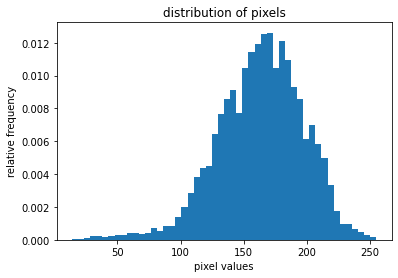

In [56]:
single_image_1 = image.imread('/content/Data/A0/00009.jpg')
plt.hist(np.array(single_image_1).ravel(), bins=50, density=True)
plt.xlabel("pixel values")
plt.ylabel("relative frequency")
plt.title("distribution of pixels")
plt.show()

In [57]:
import torchvision.transforms as transforms

In [58]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))])
normalized_img = transform(single_image_1)

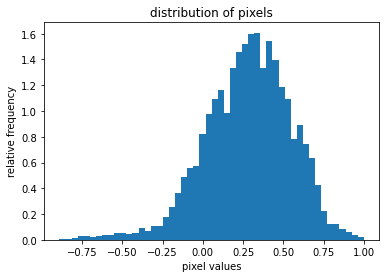

In [59]:
plt.hist(np.array(normalized_img).ravel(), bins=50, density=True)
plt.xlabel("pixel values")
plt.ylabel("relative frequency")
plt.title("distribution of pixels")
plt.show()

## **Imagefolder of pytorch**

Torchvision has implemented common datasets in advance, including the previously used cifar-10 and datasets such as Imagenet, coco, MNIST and lsun, which can be called through torchvision.datasets.cifar10. Here is a frequently used dataset – imagefolder.

Imagefolder assumes that all files are saved in folders. Pictures of the same category are stored in each folder. The folder name is class name, and its constructor is as follows:

In [60]:
from torchvision.datasets import ImageFolder

In [61]:
dataset = ImageFolder('/content/Data', transform=transform)

In [62]:
print(dataset.imgs)

[('/content/Data/A0/00009.jpg', 0), ('/content/Data/A0/00019.jpg', 0), ('/content/Data/A0/00029.jpg', 0), ('/content/Data/A0/00039.jpg', 0), ('/content/Data/A0/00049.jpg', 0), ('/content/Data/A0/00060.jpg', 0), ('/content/Data/A0/00070.jpg', 0), ('/content/Data/A0/00080.jpg', 0), ('/content/Data/A0/00090.jpg', 0), ('/content/Data/A0/00100.jpg', 0), ('/content/Data/A0/00110.jpg', 0), ('/content/Data/A0/00120.jpg', 0), ('/content/Data/A0/00130.jpg', 0), ('/content/Data/A0/00140.jpg', 0), ('/content/Data/A0/00150.jpg', 0), ('/content/Data/A0/00160.jpg', 0), ('/content/Data/A0/00170.jpg', 0), ('/content/Data/A0/00180.jpg', 0), ('/content/Data/A0/00190.jpg', 0), ('/content/Data/A0/00200.jpg', 0), ('/content/Data/A0/00210.jpg', 0), ('/content/Data/A0/00220.jpg', 0), ('/content/Data/A0/00230.jpg', 0), ('/content/Data/A0/00240.jpg', 0), ('/content/Data/A0/00250.jpg', 0), ('/content/Data/A0/00260.jpg', 0), ('/content/Data/A0/00271.jpg', 0), ('/content/Data/A0/00281.jpg', 0), ('/content/Data/A0/

In [63]:
print(dataset.class_to_idx)

{'A0': 0, 'A1': 1, 'A2': 2, 'A3': 3, 'A4': 4, 'A5': 5, 'A6': 6, 'A7': 7, 'A8': 8, 'A9': 9}


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


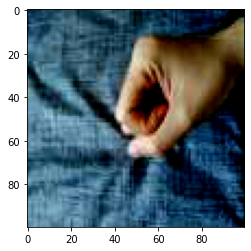

In [64]:
img = torch.permute(dataset[0][0], (2,1,0))
plt.imshow(img)

## **Normalize Pixel Values**
For most image data, the pixel values are integers with values between 0 and 255.

Neural networks process inputs using small weight values, and inputs with large integer values can disrupt or slow down the learning process. As such it is good practice to normalize the pixel values so that each pixel value has a value between 0 and 1.

It is valid for images to have pixel values in the range 0-1 and images can be viewed normally.

This can be achieved by dividing all pixels values by the largest pixel value; that is 255. This is performed across all channels, regardless of the actual range of pixel values that are present in the image.

In [65]:
# example of pixel normalization
from numpy import asarray

In [66]:
def normalize_images_in_folder(IMG_FOLDER):
    images = []
    for img in IMG_FOLDER:
        pixels = asarray(img)
        # convert from integers to floats
        pixels = pixels.astype('float32')
        # normalize to the range 0-1
        pixels = pixels/255
        # confirm the normalization
        # print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))
        # calculate global mean and standard deviation
        mean, std = pixels.mean(), pixels.std()
        # global standardization of pixels
        pixels = (pixels - mean) / std
        # confirm it had the desired effect
        mean, std = pixels.mean(), pixels.std()
        # print('Mean: %.3f, Standard Deviation: %.3f' % (mean, std))
        images.append(pixels)
    return np.array(images).astype(np.float32)


In [67]:
def give_image_a_label(images, label):
    storage = []
    for i in range(images.shape[0]):
        storage.append(label)

    return np.array(storage).astype(np.float32)

In [68]:
A_0 = normalize_images_in_folder(A_0)
print(A_0.shape)
y_0 = give_image_a_label(A_0, 0)
print(A_0[0].shape)
print(y_0[0])

(159, 100, 100, 3)
(100, 100, 3)
0.0


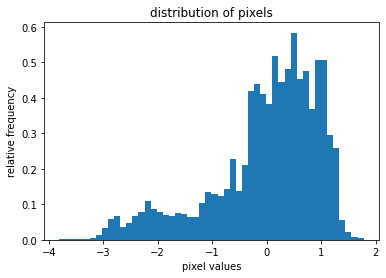

In [69]:
plt.hist(np.array(A_0[1]).ravel(), bins=50, density=True)
plt.xlabel("pixel values")
plt.ylabel("relative frequency")
plt.title("distribution of pixels")
plt.show()

In [70]:
A_1 = normalize_images_in_folder(A_1)
y_1 = give_image_a_label(A_1,1)
print(A_1[0].shape)
print(y_1[0])

A_2 = normalize_images_in_folder(A_2)
y_2 = give_image_a_label(A_2, 2)
print(A_2[0].shape)
print(y_2[0])

A_3 = normalize_images_in_folder(A_3)
y_3 = give_image_a_label(A_3, 3)
print(A_3[0].shape)
print(y_3[0])

A_4 = normalize_images_in_folder(A_4)
y_4 = give_image_a_label(A_4,4)
print(A_4[0].shape)
print(y_4[0])

A_5 = normalize_images_in_folder(A_5)
y_5 = give_image_a_label(A_5,5)
print(A_5[0].shape)
print(y_5[0])

A_6 = normalize_images_in_folder(A_6)
y_6 = give_image_a_label(A_6, 6)
print(A_6[0].shape)
print(y_6[0])

A_7 = normalize_images_in_folder(A_7)
y_7 = give_image_a_label(A_7, 7)
print(A_7[0].shape)
print(y_7[0])


A_8 = normalize_images_in_folder(A_8)
y_8 = give_image_a_label(A_8, 8)
print(A_8[0].shape)
print(y_8[0])


A_9 = normalize_images_in_folder(A_9)
y_9 = give_image_a_label(A_9, 9)
print(A_9[0].shape)
print(y_9[0])

(100, 100, 3)
1.0
(100, 100, 3)
2.0
(100, 100, 3)
3.0
(100, 100, 3)
4.0
(100, 100, 3)
5.0
(100, 100, 3)
6.0
(100, 100, 3)
7.0
(100, 100, 3)
8.0
(100, 100, 3)
9.0


In [71]:
# convert numpy array to torch tensor
A_0 = torch.from_numpy(A_0)
A_1 = torch.from_numpy(A_1)
A_2 = torch.from_numpy(A_2)
A_3 = torch.from_numpy(A_3)
A_4 = torch.from_numpy(A_4)
A_5 = torch.from_numpy(A_5)
A_6 = torch.from_numpy(A_6)
A_7 = torch.from_numpy(A_7)
A_8 = torch.from_numpy(A_8)
A_9 = torch.from_numpy(A_9)

In [72]:
y_0 = torch.from_numpy(y_0)
y_1 = torch.from_numpy(y_1)
y_2 = torch.from_numpy(y_2)
y_3 = torch.from_numpy(y_3)
y_4 = torch.from_numpy(y_4)
y_5 = torch.from_numpy(y_5)
y_6 = torch.from_numpy(y_6)
y_7 = torch.from_numpy(y_7)
y_8 = torch.from_numpy(y_8)
y_9 = torch.from_numpy(y_9)

In [73]:
# concatenate the data of normal, ball, inner_race, outer_race
X = torch.cat((A_0, A_1, A_2, A_3, A_4, A_5, A_6, A_7, A_8, A_9), dim=0)
print(X.shape)

torch.Size([1599, 100, 100, 3])


In [74]:
# concatenate the label data of normal, ball, inner_race, outer_race
y = torch.cat((y_0, y_1, y_2, y_3, y_4, y_5, y_6, y_7, y_8, y_9), dim=0)
print(y.shape)

torch.Size([1599])


In [75]:
train = X
test = y
print(train.shape)
print(test.shape)

torch.Size([1599, 100, 100, 3])
torch.Size([1599])


In [76]:
# set aside 20% of train and test data for evaluation
X_train, X_val, y_train, y_val = train_test_split(train, test,
    test_size=0.2, shuffle = True, random_state = 8)

In [77]:
print("X_train shape: {}, dtype: {}".format(X_train.shape, type(X_train)))

print("y_train shape: {}".format(y_train.shape))

print("X_val shape: {}".format(X_val.shape))
print("y_val shape: {}".format(y_val.shape))

X_train shape: torch.Size([1279, 100, 100, 3]), dtype: <class 'torch.Tensor'>
y_train shape: torch.Size([1279])
X_val shape: torch.Size([320, 100, 100, 3])
y_val shape: torch.Size([320])


In [78]:
# Functions for training
def get_dataloader(train_ds, valid_ds, bs):
    '''
        Get dataloaders of the training and validation set.
        Parameter:
            train_ds: Dataset
                Training set
            valid_ds: Dataset
                Validation set
            bs: Int
                Batch size

        Return:
            (train_dl, valid_dl): Tuple of DataLoader
                Dataloaders of training and validation set.
    '''
    return (
        DataLoader(train_ds, batch_size=bs, drop_last=True, shuffle=True),
        DataLoader(valid_ds, batch_size=bs * 2, drop_last=True),
    )


In [79]:
## Create DataLoader of train and validation set
X_train = torch.tensor(X_train, dtype=torch.float32)
X_valid = torch.tensor(X_val, dtype=torch.float32)
y_train = torch.tensor(y_train).type(torch.LongTensor)
y_valid = torch.tensor(y_val).type(torch.LongTensor)
# print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)

# add channel dimesion
X_train = X_train.permute(0, 3, 1, 2)
X_valid = X_valid.permute(0, 3, 1, 2)

print(X_train.shape)
print(X_valid.shape)

train_ds = TensorDataset(X_train, y_train)
valid_ds = TensorDataset(X_valid, y_valid)

torch.Size([1279, 3, 100, 100])
torch.Size([320, 3, 100, 100])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: To copy construct 

In [80]:
# bs = batchsize = 64 as defined in the hyperparameters "look at the above cell"
batch_size = 16
train_dl, valid_dl = get_dataloader(train_ds, valid_ds, batch_size)
print(next(iter(train_dl))[0].shape)

torch.Size([16, 3, 100, 100])


In [81]:
#Define a Convolution Neural Network

class Image_Classifier(torch.nn.Module):
    def __init__(self):
        super(Image_Classifier, self).__init__()

        self.Z1 = torch.nn.Conv2d(3, 8, 9, stride=3, padding=1).to(device)
        self.B1 = torch.nn.BatchNorm2d(8).to(device)
        self.A1 = torch.nn.ReLU().to(device)
        self.P1 = torch.nn.MaxPool2d(2, stride=2).to(device)

        self.Z2 = torch.nn.Conv2d(8, 16, 3, stride=1, padding=1).to(device)
        self.B2 = torch.nn.BatchNorm2d(16).to(device)
        self.A2 = torch.nn.ReLU().to(device)
        self.P2 = torch.nn.MaxPool2d(2, stride=2).to(device)

        self.linear1 = torch.nn.Linear(1024, 512, bias=True).to(device)
        self.A3 = torch.nn.ReLU()
        self.linear2 = torch.nn.Linear(512, 128, bias=True).to(device)
        self.A4 = torch.nn.ReLU()
        self.linear3 = torch.nn.Linear(128, 10, bias=True).to(device)

    def forward(self, data):
        data = data.to(device)
        #print('input data shape', data.size())
        layer1_1 = self.Z1(data)
        #print("after conv1", layer1_1.size())
        layer1_2 = self.B1(layer1_1)
        #print("after batch normalization", layer1_2.size())
        layer1_3 = self.A1(layer1_2)
        #print("after RELU 1", layer1_3.size())
        layer1_4 = self.P1(layer1_2)
        #print("after pooling 1", layer1_4.size())

        layer2_1 = self.Z2(layer1_4)
        #print("after conv2", layer2_1.size())
        layer2_2 = self.B2(layer2_1)
        #print("after batch normalization", layer2_2.size())

        layer2_3 = self.A2(layer2_2)
        #print("after RELU 2", layer2_3.size())

        layer2_4 = self.P2(layer2_3)
        #print("after pooling 2", layer2_4.size())


        flatten = layer2_4.view(layer2_4.size()[0], 1024)
        #print("after flatten", flatten.size())
        lin_out_1 = self.linear1(flatten)
        #print("lin_out_1", lin_out_1.size())

        layer3_1 = self.A3(lin_out_1)

        layer3_2 = self.A4(self.linear2(layer3_1))

        out = self.linear3(layer3_2)
        #print('output of the final nn.linear3', out.size())

        return F.log_softmax(out, dim=1)

In [85]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model = Image_Classifier()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [86]:
num_epochs = 100
n_total_steps = len(train_dl)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_dl):
        # orig shape: [4, 3, 100, 100] = 16, 3, 1024
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        #print("this is our input", images.shape)
        #print(labels.shape)
        outputs = model(images)
        #print('outputs shape', outputs.shape)
        loss = criterion(outputs, labels)
        #print("loss shape", loss)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i + 1) % 10 == 0:
            print(f'Epoch [{epoch + 1}/{num_epochs}], Step [{i + 1}/{n_total_steps}], Loss: {loss.item():.6f}')
            
print('Finished Training')
PATH = '/content/cnn.pth'
torch.save(model.state_dict(), PATH)

Epoch [1/100], Step [10/79], Loss: 2.329366
Epoch [1/100], Step [20/79], Loss: 2.310806
Epoch [1/100], Step [30/79], Loss: 2.258773
Epoch [1/100], Step [40/79], Loss: 2.325935
Epoch [1/100], Step [50/79], Loss: 2.276479
Epoch [1/100], Step [60/79], Loss: 2.302457
Epoch [1/100], Step [70/79], Loss: 2.294925
Epoch [2/100], Step [10/79], Loss: 2.285561
Epoch [2/100], Step [20/79], Loss: 2.287349
Epoch [2/100], Step [30/79], Loss: 2.263821
Epoch [2/100], Step [40/79], Loss: 2.236052
Epoch [2/100], Step [50/79], Loss: 2.232152
Epoch [2/100], Step [60/79], Loss: 2.245243
Epoch [2/100], Step [70/79], Loss: 2.203867
Epoch [3/100], Step [10/79], Loss: 2.150265
Epoch [3/100], Step [20/79], Loss: 2.184019
Epoch [3/100], Step [30/79], Loss: 2.178390
Epoch [3/100], Step [40/79], Loss: 2.122959
Epoch [3/100], Step [50/79], Loss: 2.146811
Epoch [3/100], Step [60/79], Loss: 2.080427
Epoch [3/100], Step [70/79], Loss: 2.132675
Epoch [4/100], Step [10/79], Loss: 2.002263
Epoch [4/100], Step [20/79], Los

In [87]:
classes = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')

In [88]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]
    for images, labels in valid_dl:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        #print("outputs", outputs)
        # max returns (value ,index)
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

        for i in range(batch_size):
            label = labels[i]
            pred = predicted[i]
            if (label == pred):
                n_class_correct[label] += 1
            n_class_samples[label] += 1

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network: {acc} %')

    for i in range(10):
        acc = 100.0 * n_class_correct[i] / n_class_samples[i]
        print(f'Accuracy of {classes[i]}: {acc} %')

Accuracy of the network: 50.625 %
Accuracy of 0: 42.857142857142854 %
Accuracy of 1: 66.66666666666667 %
Accuracy of 2: 53.84615384615385 %
Accuracy of 3: 41.666666666666664 %
Accuracy of 4: 46.666666666666664 %
Accuracy of 5: 62.5 %
Accuracy of 6: 64.28571428571429 %
Accuracy of 7: 37.5 %
Accuracy of 8: 35.0 %
Accuracy of 9: 61.111111111111114 %
